In [4]:
"""
- Data structure and quality
- Missing values patterns
- Content distribution
- Feature relationships
"""

'\n- Data structure and quality\n- Missing values patterns\n- Content distribution\n- Feature relationships\n'

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('default')
sns.set_palette("husl")

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


In [6]:
df = pd.read_csv('../data/raw/netflix_titles.csv')


print("NETFLIX DATASET LOADED")

print(f"Dataset shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Display first few rows
df.head()

NETFLIX DATASET LOADED
Dataset shape: 200 rows × 12 columns
Memory usage: 0.20 MB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
print("\nColumn Information:")
df.info()

print("\nColumn Names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

print("\nData Types:")
print(df.dtypes)


Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       200 non-null    object
 1   type          200 non-null    object
 2   title         200 non-null    object
 3   director      137 non-null    object
 4   cast          180 non-null    object
 5   country       136 non-null    object
 6   date_added    200 non-null    object
 7   release_year  200 non-null    int64 
 8   rating        200 non-null    object
 9   duration      200 non-null    object
 10  listed_in     200 non-null    object
 11  description   200 non-null    object
dtypes: int64(1), object(11)
memory usage: 18.9+ KB

Column Names:
1. show_id
2. type
3. title
4. director
5. cast
6. country
7. date_added
8. release_year
9. rating
10. duration
11. listed_in
12. description

Data Types:
show_id         object
type            object
title           ob


Columns with Missing Values:
  Column  Missing_Count  Missing_Percentage
 country             64                32.0
director             63                31.5
    cast             20                10.0


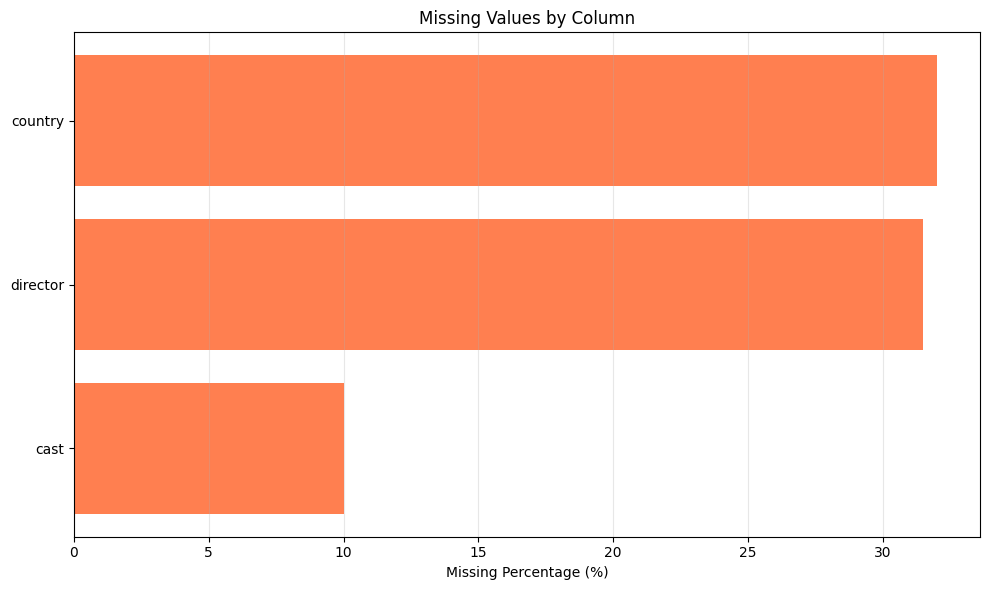

In [8]:
# Calculate missing values
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

print("\nColumns with Missing Values:")
print(missing_data.to_string(index=False))

# Visualize missing values
plt.figure(figsize=(10, 6))
missing_data_sorted = missing_data.sort_values('Missing_Percentage', ascending=True)
plt.barh(missing_data_sorted['Column'], missing_data_sorted['Missing_Percentage'], color='coral')
plt.xlabel('Missing Percentage (%)')
plt.title('Missing Values by Column')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


Content Type Distribution:
Movie      127
TV Show     73
Name: type, dtype: int64

Movies: 63.5%
TV Shows: 36.5%


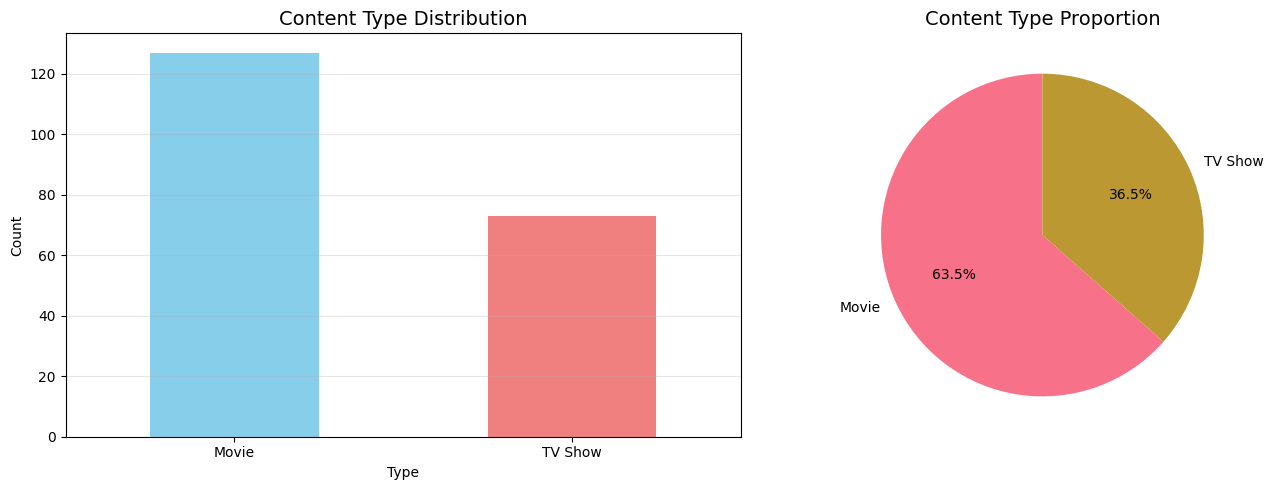

In [9]:
# Count by type
type_counts = df['type'].value_counts()
print("\nContent Type Distribution:")
print(type_counts)
print(f"\nMovies: {type_counts['Movie']/len(df)*100:.1f}%")
print(f"TV Shows: {type_counts['TV Show']/len(df)*100:.1f}%")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
type_counts.plot(kind='bar', ax=axes[0], color=['skyblue', 'lightcoral'])
axes[0].set_title('Content Type Distribution', fontsize=14)
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Type')
axes[0].tick_params(axis='x', rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Pie chart
axes[1].pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Content Type Proportion', fontsize=14)

plt.tight_layout()
plt.show()


Release Year Statistics:
count     200.000000
mean     2012.230000
std        11.609089
min      1961.000000
25%      2005.750000
50%      2018.000000
75%      2021.000000
max      2021.000000
Name: release_year, dtype: float64

Oldest content: 1961
Newest content: 2021
Median year: 2018.0


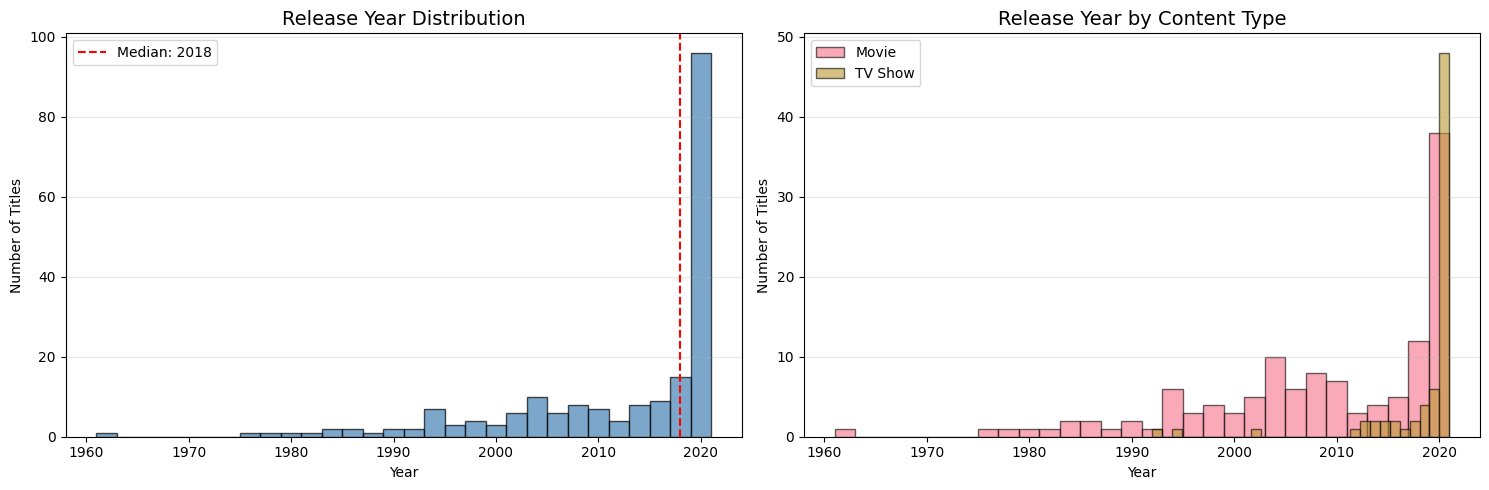

In [10]:
# Basic statistics
print("\nRelease Year Statistics:")
print(df['release_year'].describe())

print(f"\nOldest content: {df['release_year'].min()}")
print(f"Newest content: {df['release_year'].max()}")
print(f"Median year: {df['release_year'].median()}")

# Visualize release year distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(df['release_year'], bins=30, color='steelblue', alpha=0.7, edgecolor='black')
axes[0].set_title('Release Year Distribution', fontsize=14)
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Titles')
axes[0].grid(axis='y', alpha=0.3)
axes[0].axvline(df['release_year'].median(), color='red', linestyle='--', label=f'Median: {df["release_year"].median():.0f}')
axes[0].legend()

# By type
for content_type in df['type'].unique():
    type_data = df[df['type'] == content_type]['release_year']
    axes[1].hist(type_data, bins=30, alpha=0.6, label=content_type, edgecolor='black')

axes[1].set_title('Release Year by Content Type', fontsize=14)
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of Titles')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


RATING ANALYSIS

Top 10 Ratings:
TV-MA    50
TV-14    34
PG-13    28
R        23
TV-PG    22
TV-Y7    14
PG       13
TV-Y     10
TV-G      5
G         1
Name: rating, dtype: int64


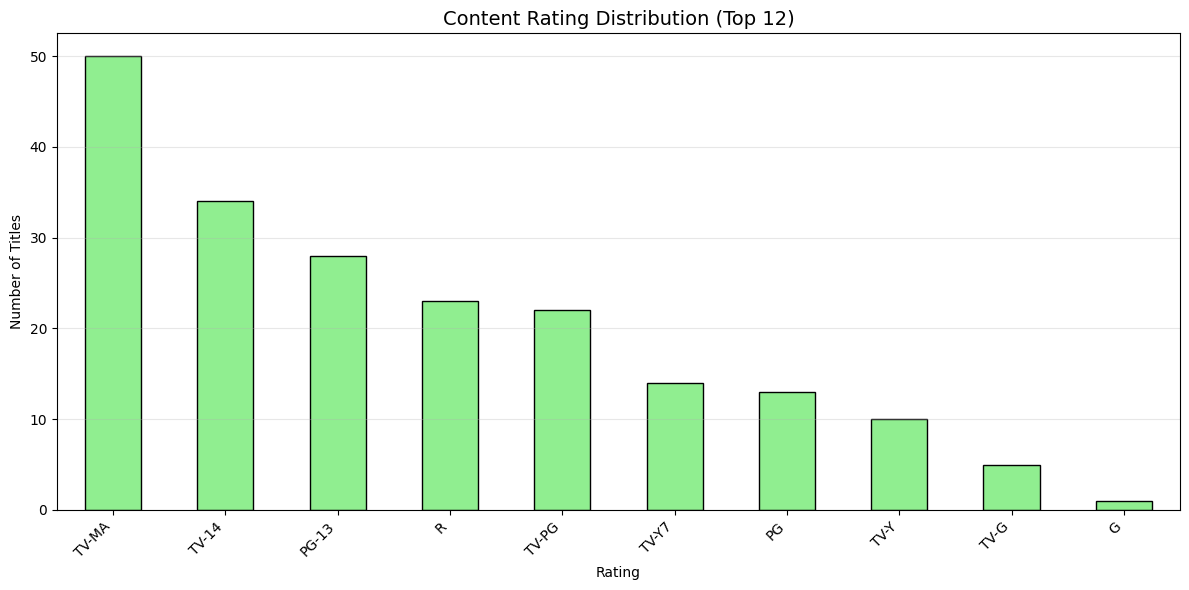


Rating Distribution by Content Type:
type    Movie  TV Show
rating                
G           1        0
PG         13        0
PG-13      28        0
R          23        0
TV-14      23       11
TV-G        1        4
TV-MA      19       31
TV-PG      14        8
TV-Y        3        7
TV-Y7       2       12


In [11]:
print("\n" + "=" * 60)
print("RATING ANALYSIS")
print("=" * 60)

# Rating counts
rating_counts = df['rating'].value_counts()
print("\nTop 10 Ratings:")
print(rating_counts.head(10))

# Visualize
plt.figure(figsize=(12, 6))
rating_counts.head(12).plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Content Rating Distribution (Top 12)', fontsize=14)
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Rating by type
print("\nRating Distribution by Content Type:")
rating_by_type = pd.crosstab(df['rating'], df['type'])
print(rating_by_type.head(10))

GENRE ANALYSIS

Total unique genres: 38

Top 20 Genres:
Dramas                       45
International Movies         42
Comedies                     41
Action & Adventure           40
International TV Shows       31
Kids' TV                     22
TV Comedies                  20
Thrillers                    17
TV Dramas                    16
Romantic Movies              15
Children & Family Movies     15
Anime Features               12
Documentaries                12
Crime TV Shows               11
Reality TV                   10
Docuseries                   10
Music & Musicals              7
Classic Movies                6
Spanish-Language TV Shows     6
Sci-Fi & Fantasy              6
Name: listed_in, dtype: int64


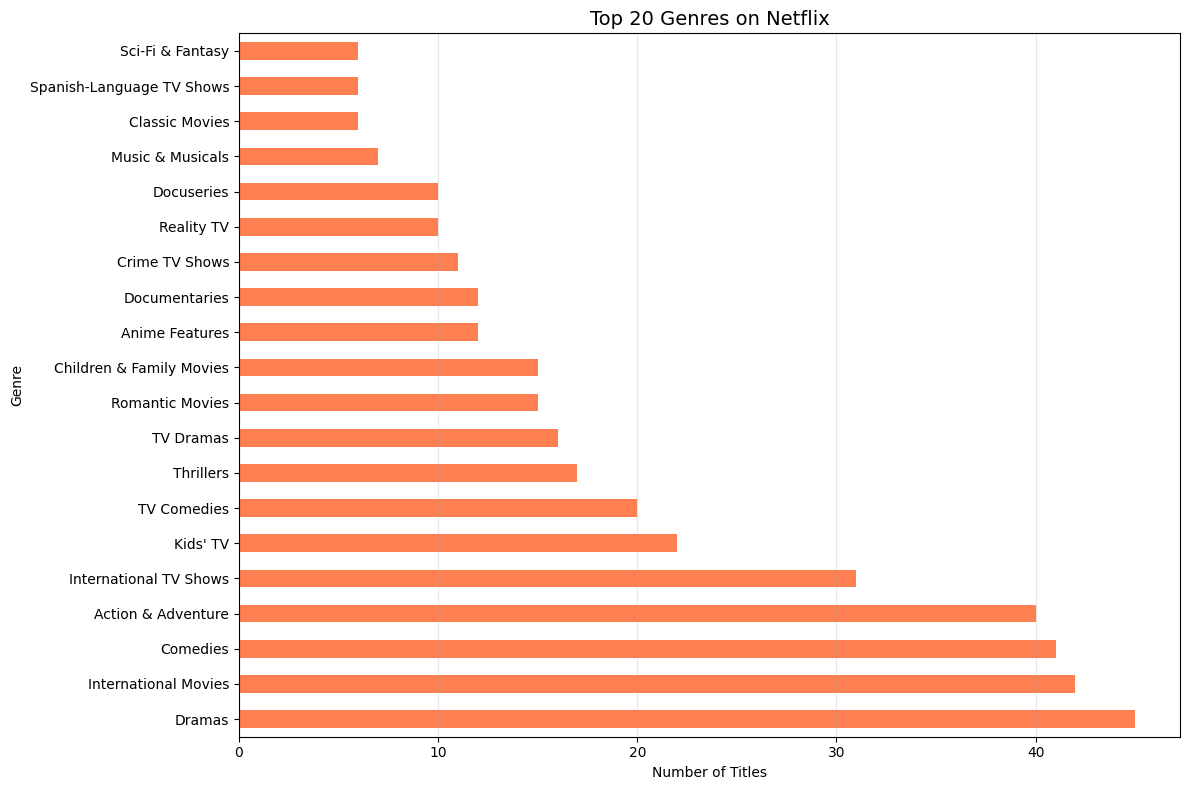

In [12]:
print("GENRE ANALYSIS")

# Extract all genres
all_genres = df['listed_in'].dropna().str.split(',').explode().str.strip()
genre_counts = all_genres.value_counts()

print(f"\nTotal unique genres: {len(genre_counts)}")
print("\nTop 20 Genres:")
print(genre_counts.head(20))

# Visualize top genres
plt.figure(figsize=(12, 8))
genre_counts.head(20).plot(kind='barh', color='coral')
plt.title('Top 20 Genres on Netflix', fontsize=14)
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

COUNTRY ANALYSIS

Total unique countries: 29

Top 15 Countries:
United States     77
India             16
United Kingdom    16
Japan             16
France             7
Canada             6
Australia          6
Germany            5
Nigeria            4
South Africa       3
Hong Kong          3
Italy              3
South Korea        3
China              3
Mexico             2
Name: country, dtype: int64


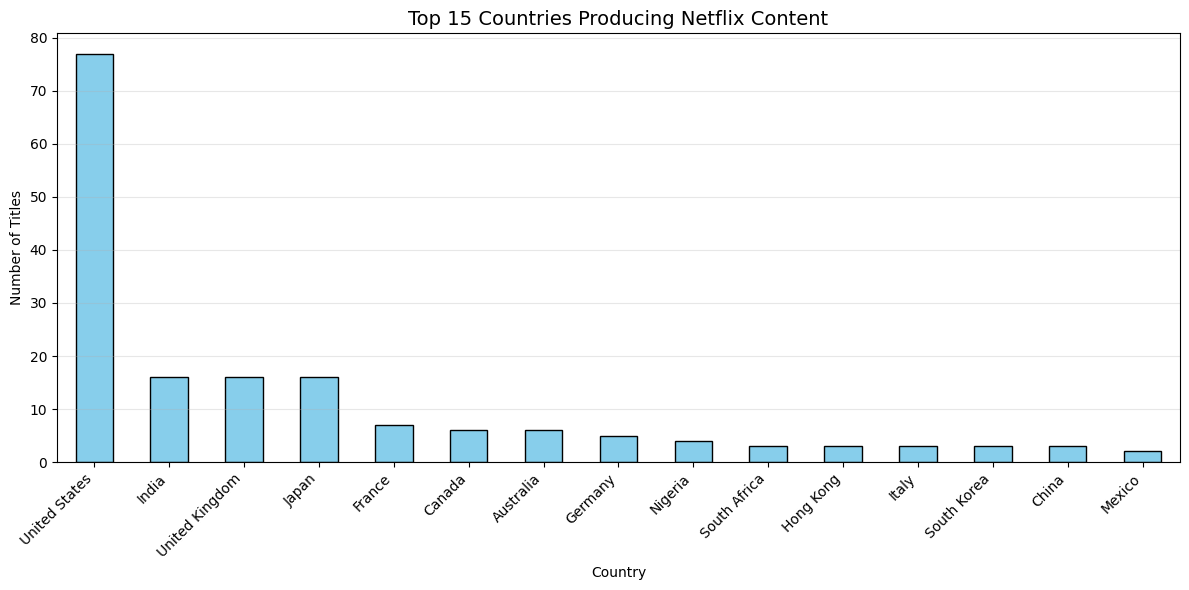

In [13]:
print("COUNTRY ANALYSIS")

# Extract all countries
all_countries = df['country'].dropna().str.split(',').explode().str.strip()
country_counts = all_countries.value_counts()

print(f"\nTotal unique countries: {len(country_counts)}")
print("\nTop 15 Countries:")
print(country_counts.head(15))

# Visualize
plt.figure(figsize=(12, 6))
country_counts.head(15).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 15 Countries Producing Netflix Content', fontsize=14)
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

DURATION ANALYSIS

Duration column sample:
1 Season     43
2 Seasons    13
95 min        7
97 min        5
3 Seasons     5
106 min       5
94 min        5
91 min        4
5 Seasons     4
96 min        3
Name: duration, dtype: int64

Movie Duration Statistics (minutes):
count    127.000000
mean     106.275591
std       25.864015
min       13.000000
25%       94.000000
50%      103.000000
75%      117.500000
max      229.000000
Name: duration_minutes, dtype: float64

TV Show Seasons Statistics:
count    73.000000
mean      2.082192
std       1.831464
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       9.000000
Name: seasons, dtype: float64


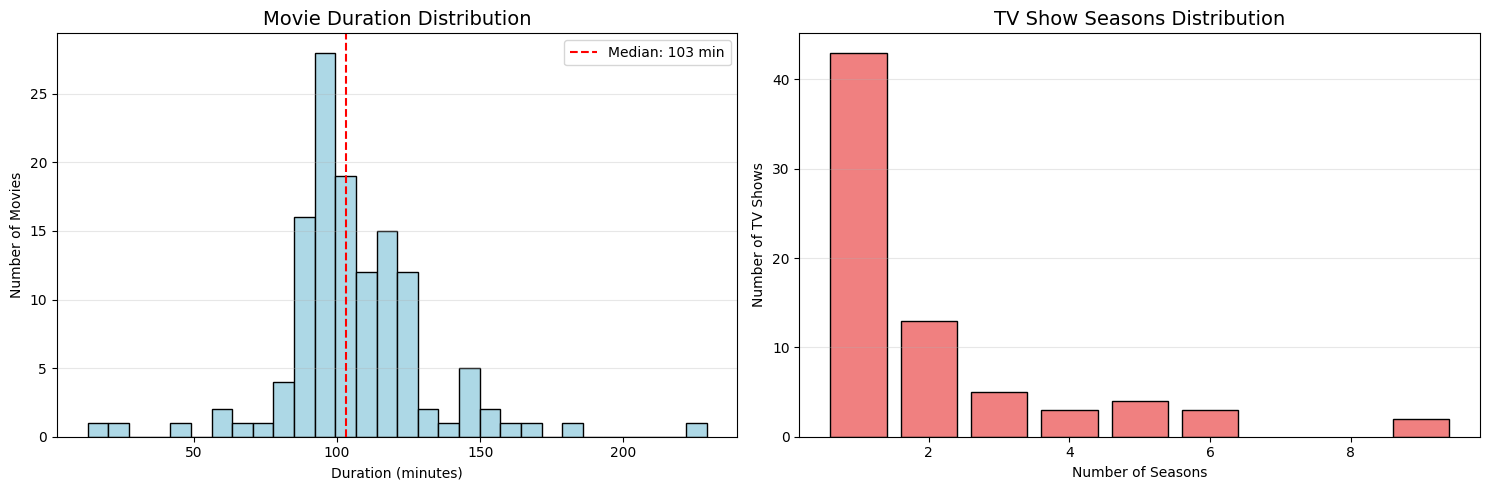

In [14]:
print("DURATION ANALYSIS")

# Analyze duration patterns
print("\nDuration column sample:")
print(df['duration'].value_counts().head(10))

# Separate movies and TV shows duration
movies = df[df['type'] == 'Movie'].copy()
tv_shows = df[df['type'] == 'TV Show'].copy()

# Extract numeric duration for movies (minutes)
movies['duration_minutes'] = movies['duration'].str.extract('(\d+)').astype(float)
print(f"\nMovie Duration Statistics (minutes):")
print(movies['duration_minutes'].describe())

# Extract seasons for TV shows
tv_shows['seasons'] = tv_shows['duration'].str.extract('(\d+)').astype(float)
print(f"\nTV Show Seasons Statistics:")
print(tv_shows['seasons'].describe())

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Movie duration
axes[0].hist(movies['duration_minutes'].dropna(), bins=30, color='lightblue', edgecolor='black')
axes[0].set_title('Movie Duration Distribution', fontsize=14)
axes[0].set_xlabel('Duration (minutes)')
axes[0].set_ylabel('Number of Movies')
axes[0].axvline(movies['duration_minutes'].median(), color='red', linestyle='--', 
                label=f'Median: {movies["duration_minutes"].median():.0f} min')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# TV show seasons
season_counts = tv_shows['seasons'].value_counts().sort_index()
axes[1].bar(season_counts.index, season_counts.values, color='lightcoral', edgecolor='black')
axes[1].set_title('TV Show Seasons Distribution', fontsize=14)
axes[1].set_xlabel('Number of Seasons')
axes[1].set_ylabel('Number of TV Shows')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

CONTENT ADDITION TRENDS

Content Added Per Year:
year_added
2021    200
dtype: int64


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (12,) and arg 1 with shape (2,).

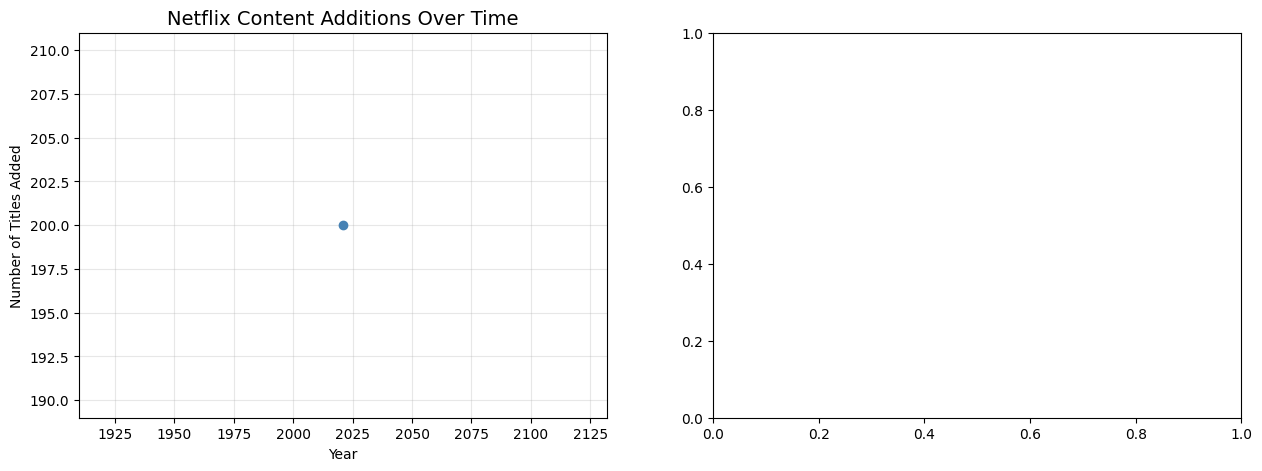

In [15]:
print("CONTENT ADDITION TRENDS")

# Parse date_added
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Content added by year
yearly_additions = df.groupby('year_added').size()
print("\nContent Added Per Year:")
print(yearly_additions.tail(10))

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Yearly additions
yearly_additions.plot(kind='line', ax=axes[0], marker='o', color='steelblue', linewidth=2)
axes[0].set_title('Netflix Content Additions Over Time', fontsize=14)
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Titles Added')
axes[0].grid(True, alpha=0.3)

# Monthly pattern
monthly_additions = df.groupby('month_added').size()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
axes[1].bar(range(1, 13), monthly_additions, color='coral', edgecolor='black')
axes[1].set_title('Content Additions by Month', fontsize=14)
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Number of Titles')
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels(months, rotation=45)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
exploration_results = {
    'total_titles': len(df),
    'movies': len(df[df['type'] == 'Movie']),
    'tv_shows': len(df[df['type'] == 'TV Show']),
    'unique_genres': len(genre_counts),
    'unique_countries': len(country_counts),
    'date_range': f"{df['release_year'].min()} - {df['release_year'].max()}",
    'missing_director_pct': (df['director'].isnull().sum() / len(df) * 100),
    'missing_cast_pct': (df['cast'].isnull().sum() / len(df) * 100)
}

print("\n✓ Data exploration completed!")
print("✓ Ready for preprocessing (Notebook 02)")